# Lab 4 
## Interactive effects

-----

$${\displaystyle y_{i}=\beta _{0}+\beta _{1}X_{i1}}$$

Suppose we have a factor (nominal variable) with two levels.

In that case: 

$$X_{i_1} = 1$$ if $$f = a$$

and

$$X_{i_1} = 0$$ if $$f = b$$

-----

$${\displaystyle y_{i}=\beta _{0}+\beta _{1} f a_{i}}$$

a0 is just the mean of y when f == b (base level)

a1 is the difference between the mean of y in condition b and mean of y in condition a

In [59]:
# the t-test as a linear model

n=10
f = rep(c('a', 'b'), each = n)
y=c(a=1,b=1)[f] + rnorm(2*n)

In [60]:
par(bg = 'white')

plot(y ~ as.factor(f))

ERROR: Error in f * g: non-numeric argument to binary operator


In [58]:
# unique varaibles in our model matrix
model.matrix(y ~ f)

ERROR: Error in model.frame.default(object, data, xlev = xlev): variable lengths differ (found for 'f')


In [48]:
m = lm(y ~ f)

In [49]:
summary(m)


Call:
lm(formula = y ~ f)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.84858 -0.62854  0.03451  0.82013  1.46596 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.7980     0.3203   30.59  < 2e-16 ***
fb           10.2575     0.4529   22.65 1.12e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.013 on 18 degrees of freedom
Multiple R-squared:  0.9661,	Adjusted R-squared:  0.9642 
F-statistic: 512.9 on 1 and 18 DF,  p-value: 1.115e-14


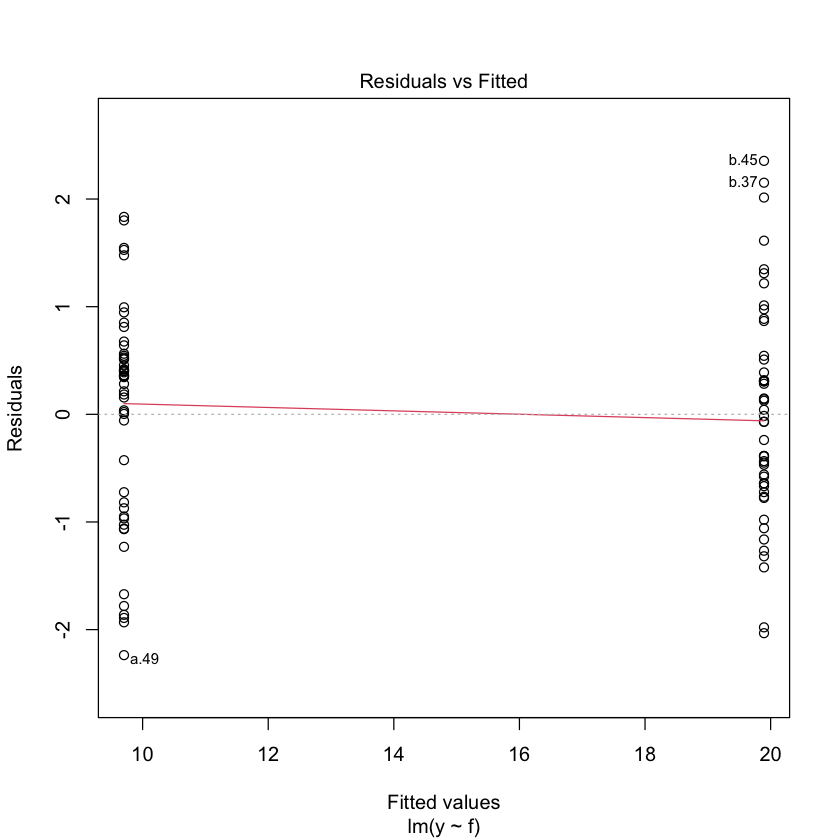

hat values (leverages) are all = 0.02
 and there are no factor predictors; no plot no. 5



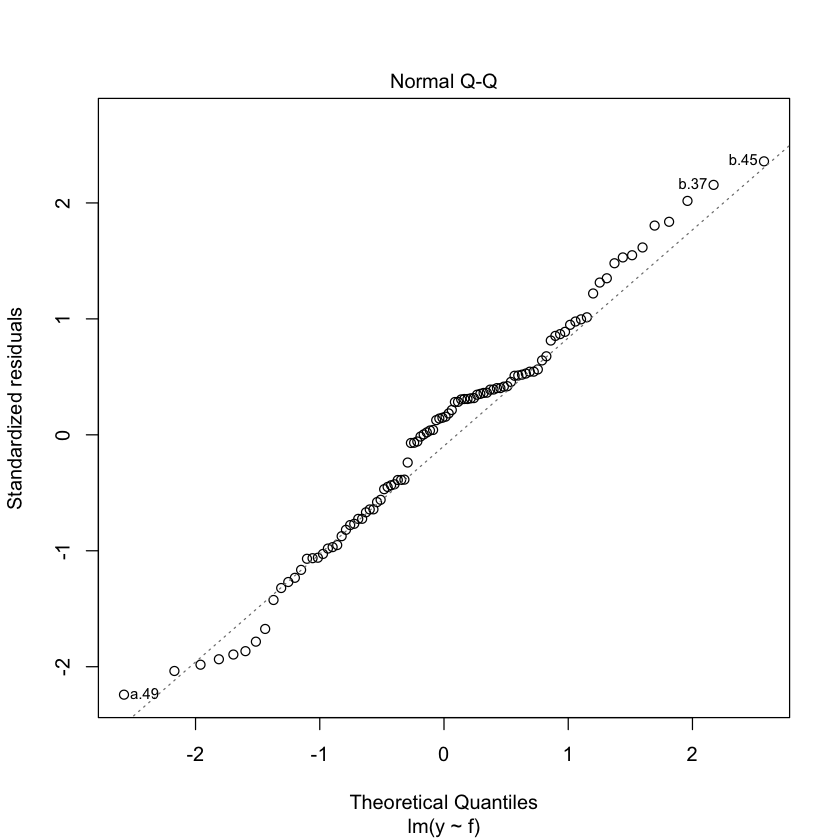

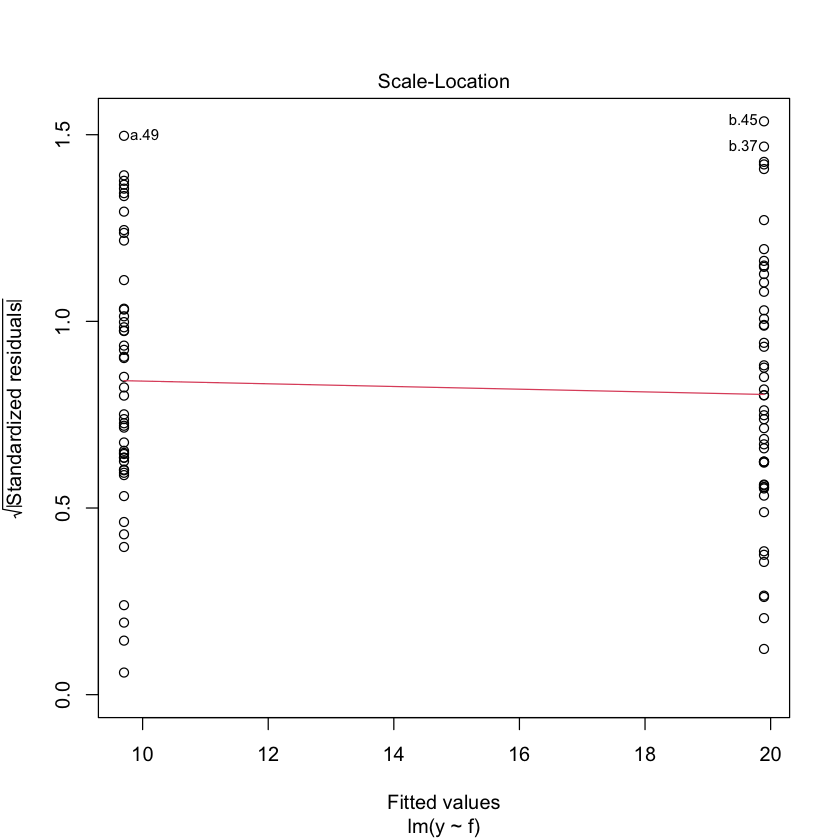

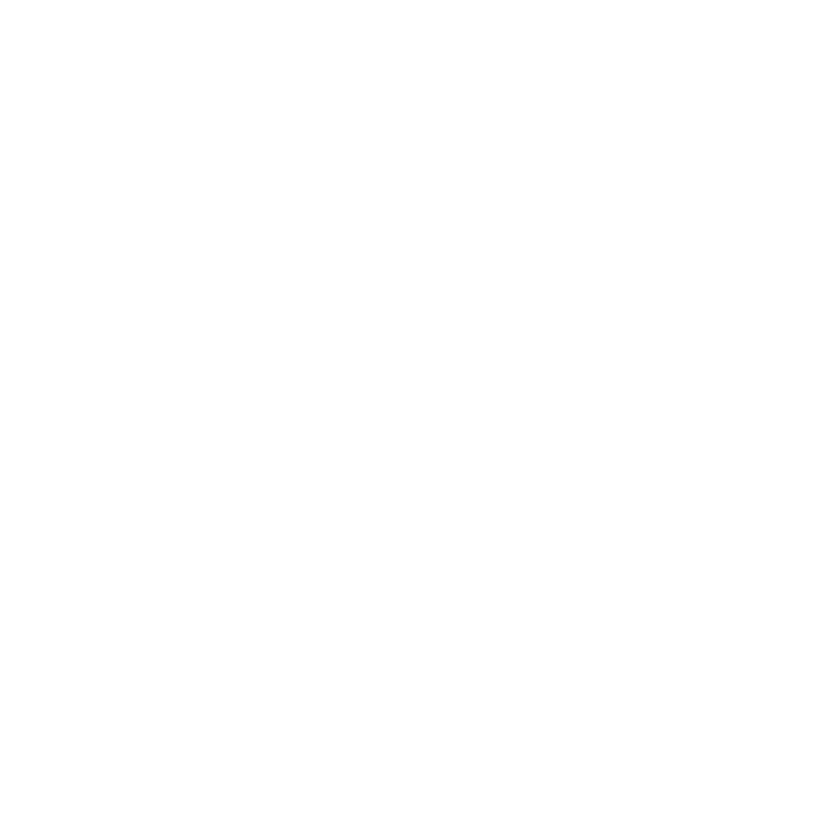

In [8]:
par(bg = 'white')

plot(m)

We can also do it like this:

$$y_i = a_0fa_i + a_1fb_i$$


if a yi = a0 ; if b yi = a1

But this model does not contain difference as a coefficient

-------

### Three-levels model

When a factor has three levels: a,b,c (a is a base level)

$$y_i = a_0 + a_1fb_i + a_2fc_i$$

a0 -> average (expected) value of y when we have base level f=a (so the rest is 0)

a1 and a2 represent the effect of b and c respectively (b-a and c-a) on the mean of y

In [29]:
library(rstan)
library(lme4)

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.2, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Loading required package: Matrix



'data.frame':	180 obs. of  3 variables:
 $ Reaction: num  250 259 251 321 357 ...
 $ Days    : num  0 1 2 3 4 5 6 7 8 9 ...
 $ Subject : Factor w/ 18 levels "308","309","310",..: 1 1 1 1 1 1 1 1 1 1 ...


Loading required package: lattice



Linear mixed model fit by REML ['lmerMod']
Formula: Reaction ~ Days + (Days | Subject)
   Data: sleepstudy
 Subset: Days >= 2
REML criterion at convergence: 1404.094
Random effects:
 Groups   Name        Std.Dev. Corr 
 Subject  (Intercept) 31.507        
          Days         6.766   -0.25
 Residual             25.526        
Number of obs: 144, groups:  Subject, 18
Fixed Effects:
(Intercept)         Days  
     245.10        11.44  

Linear mixed model fit by REML ['lmerMod']
Formula: Reaction ~ Days + (1 | Subject) + (0 + Days | Subject)
   Data: sleepstudy
 Subset: Days >= 2
REML criterion at convergence: 1404.626
Random effects:
 Groups    Name        Std.Dev.
 Subject   (Intercept) 28.843  
 Subject.1 Days         6.285  
 Residual              25.747  
Number of obs: 144, groups:  Subject, 18
Fixed Effects:
(Intercept)         Days  
     245.10        11.44  

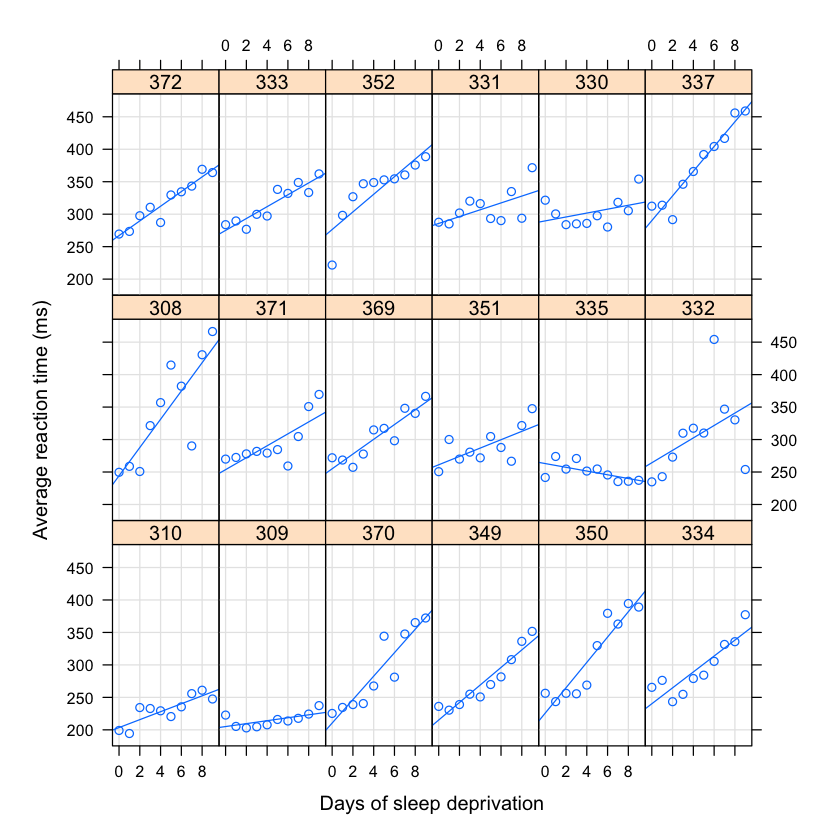

In [30]:
# Example

str(sleepstudy)
require(lattice)
xyplot(Reaction ~ Days | Subject, sleepstudy, type = c("g","p","r"),
       index = function(x,y) coef(lm(y ~ x))[1],
       xlab = "Days of sleep deprivation",
       ylab = "Average reaction time (ms)", aspect = "xy")
(fm1 <- lmer(Reaction ~ Days + (Days|Subject), sleepstudy, subset=Days>=2))
## independent model
(fm2 <- lmer(Reaction ~ Days + (1|Subject) + (0+Days|Subject), sleepstudy, subset=Days>=2))

In [42]:
model.matrix(~ Days * Subject, data)

,(Intercept),Days,Subject309,Subject310,Subject330,Subject331,Subject332,Subject333,Subject334,Subject335,⋯,Days:Subject335,Days:Subject337,Days:Subject349,Days:Subject350,Days:Subject351,Days:Subject352,Days:Subject369,Days:Subject370,Days:Subject371,Days:Subject372
1,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,1,2,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,1,3,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,1,4,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,1,5,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
7,1,6,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
8,1,7,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
9,1,8,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
10,1,9,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [31]:
data = sleepstudy
model = lm(Reaction ~ Days * Subject, data)

-------
### Exaple of 2nd order interactions

$$Reaction_i = a_0 + a_1Days_i$$

- a_0 -> average reaction time at the beginning

Assume subject  = {Adam, Ewa}:

Reaction ~ Days * Subject // R interpretes it as Reactions ~ 1 + Days + Subject_ewa + Days*Subject_Ewa

$$Reaction_i = a_0 + a_1Days_i + a_2Subject_{ewa} + a_3Days_i*Subject_{ewa}$$

- a0 = average reaction time at the beginning
- a1 = effect of days -> average diff in reaction time when the day change
- a2 = effect of subject -> average diff in the reaction time depend of subject // diffs in interceptes
- a3 = how does the effect of subject change depend of days change // average difference in slopes between subjects

------

In [31]:
summary(model)


Call:
lm(formula = Reaction ~ Days * Subject, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-106.397  -10.692   -0.177   11.417  132.510 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      244.193     15.042  16.234  < 2e-16 ***
Days              21.765      2.818   7.725 1.74e-12 ***
Subject309       -39.138     21.272  -1.840 0.067848 .  
Subject310       -40.708     21.272  -1.914 0.057643 .  
Subject330        45.492     21.272   2.139 0.034156 *  
Subject331        41.546     21.272   1.953 0.052749 .  
Subject332        20.059     21.272   0.943 0.347277    
Subject333        30.826     21.272   1.449 0.149471    
Subject334        -4.030     21.272  -0.189 0.850016    
Subject335        18.842     21.272   0.886 0.377224    
Subject337        45.911     21.272   2.158 0.032563 *  
Subject349       -29.081     21.272  -1.367 0.173728    
Subject350       -18.358     21.272  -0.863 0.389568    
Subject351        16.95

-----
### Example of 3rd order interactions: **f,g,h, each has levels a and b:**

$$y = f* g * h  = f + g + h + f:g + f:h + g:h + f:g:h $$

- a0 = E[y] when all the other predictors are 0 (when f=a, g=a, h=a)
- a1 = E[y]f_b - E[y]f_a , when g=a and h=a // average diff on y between f_a nad f_b
- a2,a3 = the same 
- a4 = change in the effect of f_b vs f_a when we switch from g_a to g_b
- a7 = change in (above) when we switch from h_a to h_b // how doeas the effect of f_b vs f_a in switching between g (a,b) and h(a,b)
---

In [35]:
library(rstanarm)

Loading required package: Rcpp

This is rstanarm version 2.21.1

- See https://mc-stan.org/rstanarm/articles/priors for changes to default priors!

- Default priors may change, so it's safest to specify priors, even if equivalent to the defaults.

- For execution on a local, multicore CPU with excess RAM we recommend calling

  options(mc.cores = parallel::detectCores())


Attaching package: ‘rstanarm’


The following object is masked from ‘package:rstan’:

    loo




In [38]:
# the same model, but using bayesian inference - the results are essentialy the same in this case. 
## Compare it to the frequentist confodence intervals

model_bayesian = stan_glm(Reaction ~ Days * Subject, data=sleepstudy)


SAMPLING FOR MODEL 'continuous' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 2.9e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.377686 seconds (Warm-up)
Chain 1:                0.305486 seconds (Sampling)
Chain 1:              

Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#bulk-ess”


In [37]:
summary(model_bayesian, probs=c(.025, .975))


Model Info:
 function:     stan_glm
 family:       gaussian [identity]
 formula:      Reaction ~ Days * Subject
 algorithm:    sampling
 sample:       4000 (posterior sample size)
 priors:       see help('prior_summary')
 observations: 180
 predictors:   36

Estimates:
                  mean   sd    2.5%   97.5%
(Intercept)     245.1   14.8 216.4  272.6  
Days             21.5    2.7  16.5   26.8  
Subject309      -39.8   21.2 -79.5    2.3  
Subject310      -41.9   21.1 -82.0   -1.0  
Subject330       44.2   21.8   1.3   86.6  
Subject331       40.6   21.0  -0.4   80.8  
Subject332       19.3   21.3 -21.9   62.7  
Subject333       29.5   21.0 -11.8   71.1  
Subject334       -5.0   20.9 -44.3   36.7  
Subject335       17.7   21.4 -23.7   60.0  
Subject337       44.9   21.4   3.3   87.9  
Subject349      -29.9   21.7 -71.6   12.7  
Subject350      -19.3   21.1 -59.1   21.8  
Subject351       15.9   21.1 -25.2   57.4  
Subject352       31.3   21.5  -9.8   74.1  
Subject369        9.8   2

In [40]:
fci = confint(lm(Reaction ~ Days * Subject, data))
bci = posterior_interval(model_bayesian)

### *So far I know (from practise): how to fit LM in R, perform basic Bayesian Inference, interprete interaction effects*

For binary variables, as well as for some other kinds of variables, variance is a function of the mean. One we know the mean, we also know the variance.

y = (0,0,1,0,0,1,1,0,0)


mean of y = 3/9 -> that means that we have to have 3x1 and 6x0

The concrete sequance doesn't matter - matter variance and mean. The variance is the highest when half of the set is different. In that case confidence interval is very wide (when the expected value is close to .5)